In [83]:
#Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Create the df_subset:
df_subset = df.loc[:, ['Job #', 'Doc #', 'Borough', 'Initial Cost',
    'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage',
    'Street Frontage', 'ExistingNo. of Stories','Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

/Users/maia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [20]:
# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None


Excellent! Notice that the columns 'Initial Cost' and 'Total Est. Fee' are of type object. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. You saw in the previous exercise that there are also a lot of 0 values. Given the amount of data that is missing in the full dataset, it's highly likely that these 0 values represent missing data.



In [25]:
# examine the common stats of numeric columns
print(df_subset.describe())

              Job #         Doc #  Existing Zoning Sqft  Proposed Zoning Sqft  \
count  1.284600e+04  12846.000000          1.284600e+04          1.284600e+04   
mean   2.426788e+08      1.162930          1.439973e+03          2.007286e+03   
std    1.312507e+08      0.514937          3.860757e+04          4.081570e+04   
min    1.036438e+08      1.000000          0.000000e+00          0.000000e+00   
25%    1.216206e+08      1.000000          0.000000e+00          0.000000e+00   
50%    2.202645e+08      1.000000          0.000000e+00          0.000000e+00   
75%    3.208652e+08      1.000000          0.000000e+00          0.000000e+00   
max    5.400246e+08      9.000000          2.873107e+06          2.873107e+06   

       Enlargement SQ Footage  Street Frontage  ExistingNo. of Stories  \
count            12846.000000     12846.000000            12846.000000   
mean                46.101432         3.069360                8.062354   
std                784.216569        37.246034  

Great work! In addition to the suspicious number of 0 values, which may represent missing data, notice that the columns that contain monetary values - 'Initial Cost' and 'Total Est. Fee' - have a dollar sign in the beginning. These columns may be coded as strings instead of numeric values. You will check this in the next exercise.



In [21]:
df_subset.head()

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54
3,121601203,1,MANHATTAN,$1500.00,$225.00,0,0,0,0,12,12,120,120
4,121601338,1,MANHATTAN,$19500.00,$389.50,0,0,0,0,6,6,64,64


In [22]:
df_subset.tail()

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
12841,520143988,1,STATEN ISLAND,$30700.00,$448.62,1490,1782,206,0,1,1,10,10
12842,121613833,1,MANHATTAN,$62000.00,$852.10,0,0,0,0,5,5,55,55
12843,121681260,1,MANHATTAN,$166000.00,$1923.30,0,0,0,0,6,6,64,64
12844,320771704,1,BROOKLYN,$65000.00,$883.00,0,0,0,0,1,1,18,18
12845,520143951,1,STATEN ISLAND,$9500.00,$316.50,0,0,0,0,1,1,18,18


Loading and viewing your data

In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the NYC Open Data portal. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the .head() and .tail() methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The .shape and .columns attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, df_subset, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.



Further diagnosis

In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful .info() method.

The .info() method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the 'Initial Cost' and 'Total Est. Fee' columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them.

The full DataFrame df and the subset DataFrame df_subset have been pre-loaded. Your task is to use the .info() method on these and analyze the results.



In [17]:
df_subset.columns

Index(['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee',
       'Existing Zoning Sqft', 'Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height'],
      dtype='object')

In [30]:
df_subset['Enlargement SQ Footage'].value_counts(dropna = False)

0        12546
360          5
1307         3
1000         3
720          2
588          2
700          2
243          2
900          2
162          2
1212         2
139          2
372          2
1            2
1170         2
1018         2
173          2
142          2
573          2
781          2
396          2
234          2
391          2
196          2
320          2
567          2
240          2
200          2
1155         2
268          2
         ...  
1868         1
1940         1
3708         1
1493         1
1397         1
1221         1
1213         1
1189         1
1117         1
861          1
813          1
757          1
597          1
365          1
12651        1
301          1
261          1
4351         1
245          1
229          1
205          1
197          1
189          1
4263         1
165          1
149          1
2180         1
109          1
45           1
220          1
Name: Enlargement SQ Footage, Length: 266, dtype: int64

Fantastic work! Notice how not all values in the 'State' column are NY. This is an interesting find, as this data is supposed to consist of applications filed in NYC. Curiously, all the 'Borough' values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset. Also, for the 'Site Fill' column, you may or may not need to recode the NOT APPLICABLE values to NaN in your final analysis.



In [32]:
#Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
MA        6
GA        6
KS        6
VA        5
CO        4
MN        3
WI        3
SC        3
AZ        3
UT        2
RI        2
NC        2
IN        1
NM        1
MI        1
VT        1
WA        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


In [98]:
df_subset.head(5)

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54
3,121601203,1,MANHATTAN,$1500.00,$225.00,0,0,0,0,12,12,120,120
4,121601338,1,MANHATTAN,$19500.00,$389.50,0,0,0,0,6,6,64,64


In [101]:
print(df_subset['Existing Height'].count())
df_subset[df_subset['Existing Height'].isna()]

12846


,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height


In [105]:
df_subset['Borough'].value_counts()

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [ ]:
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

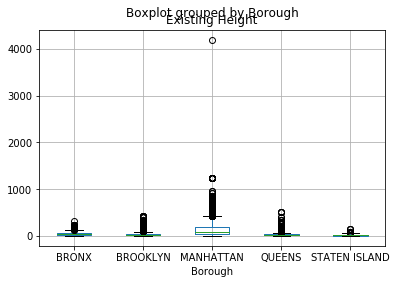

In [106]:
df.boxplot(column = 'Existing Height', by ='Borough')
plt.show()

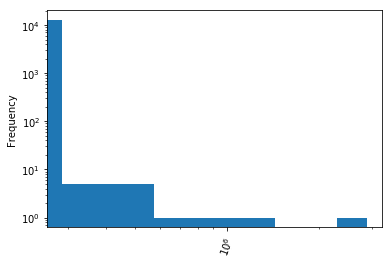

In [64]:
#Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
df['Existing Zoning Sqft'].describe()

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

In [111]:
a = '$75000.00'
b = lambda x : x[1:]
c = b(a)
print(c)

75000.00


In [131]:
df_subset['initial_cost'] = df_subset['Initial Cost'].apply(lambda x : x[1:]).astype(float)
df_subset.head()

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 14 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
initial_cost               12846 non-null float64
dtypes: float64(1), int64(10), object(3)
memory usage: 1.4+ MB


In [138]:
df_subset['total_est_fee'] = df_subset['Total Est. Fee'].apply(lambda x: x[1:]).astype(float)
df_subset.head()

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,initial_cost,total_est_fee
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0,75000.0,986.0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0,0.0,1144.0
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54,30000.0,522.5
3,121601203,1,MANHATTAN,$1500.00,$225.00,0,0,0,0,12,12,120,120,1500.0,225.0
4,121601338,1,MANHATTAN,$19500.00,$389.50,0,0,0,0,6,6,64,64,19500.0,389.5


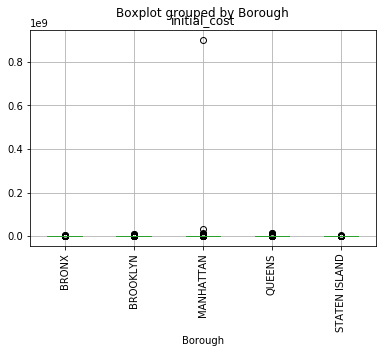

In [121]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df_subset.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

In [141]:
df['initial_cost'] = df.apply(lambda row: row.loc['Initial Cost'][1:], axis = 1).astype(float)
df['total_est_fee'] = df.apply(lambda row: row.loc['Total Est. Fee'][1:], axis = 1).astype(float)

In [142]:
df.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate,initial_cost,total_est_fee
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM,75000.0,986.0
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM,0.0,1144.0
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM,30000.0,522.5
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM,1500.0,225.0
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM,19500.0,389.5


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 84 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [92]:
type(df['initial_cost'])

pandas.core.series.Series

#### Excellent work! In general, from the second plot it seems like there is a strong correlation between 'initial_cost' and 'total_est_fee'. In addition, take note of the large number of points that have an 'initial_cost' of 0. It is difficult to infer any trends from the first plot because it is dominated by the outliers.



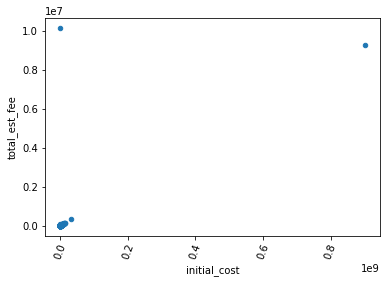

In [144]:
#Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()



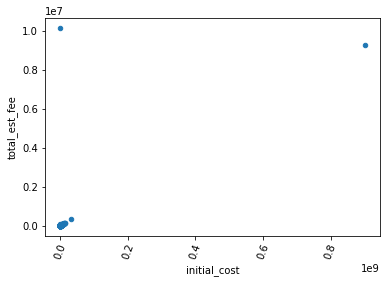

In [145]:
# Create and display the second scatter plot
df_subset.plot(kind='scatter', x ='initial_cost', y = 'total_est_fee', rot = 70)
plt.show()

In [ ]:
# Create and display the second scatter plot
df_subset.plot(kind='scatter', x ='initial_cost', y = 'total_est_fee', rot = 70)
plt.show()

In [188]:
import pandas as pd
airquality = pd.read_csv('airquality.csv')
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [189]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


In [190]:
#Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns= 'measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN
measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


In [160]:
#Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [191]:
#Pivot table the airquality_dup: airquality_pivot
#airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
print(airquality_pivot)

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot)

# Print the head of airquality
print(airquality.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3
      6       28.0      NaN  66.0  14.9
      7       23.0    299.0  65.0   8.6
      8       19.0     99.0  59.0  13.8
      9        8.0     19.0  61.0  20.1
      10       NaN    194.0  69.0   8.6
      11       7.0      NaN  74.0   6.9
      12      16.0    256.0  69.0   9.7
      13      11.0    290.0  66.0   9.2
      14      14.0    274.0  68.0  10.9
      15      18.0     65.0  58.0  13.2
      16      14.0    334.0  64.0  11.5
      17      34.0    307.0  66.0  12.0
      18       6.0     78.0  57.0  18.4
      19      30.0    322.0  68.0  11.5
      20      11.0     44.0  62.0   9.7
      21       1.0      8.0  59.0   9.7
      22      11.0    320.0  73.0  16.6
      23       4.0     25.0  61.0   9.7


In [165]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


In [166]:
airquality_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 4 columns):
Month          612 non-null int64
Day            612 non-null int64
measurement    612 non-null object
reading        568 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 19.2+ KB


In [167]:
airquality_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 153 entries, (5, 1) to (9, 30)
Data columns (total 4 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Temp       153 non-null float64
Wind       153 non-null float64
dtypes: float64(4)
memory usage: 5.5 KB


In [173]:
tb = pd.read_csv('tb.csv')

In [175]:
#Melt tb: tb_melt
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


In [236]:
ebola = pd.read_csv('ebola.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [237]:
#Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

In [238]:
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [239]:
#Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


In [240]:
ebola_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 7 columns):
Date            1952 non-null object
Day             1952 non-null int64
type_country    1952 non-null object
counts          738 non-null float64
str_split       1952 non-null object
type            1952 non-null object
country         1952 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 106.8+ KB


In [241]:
# Assert that there are no missing values
assert pd.notnull(ebola).all().all()

# Assert that all values are >= 0
assert (ebola >= 0).all().all()

AssertionError: 

In [ ]:
Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())

In [ ]:
Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt, status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())

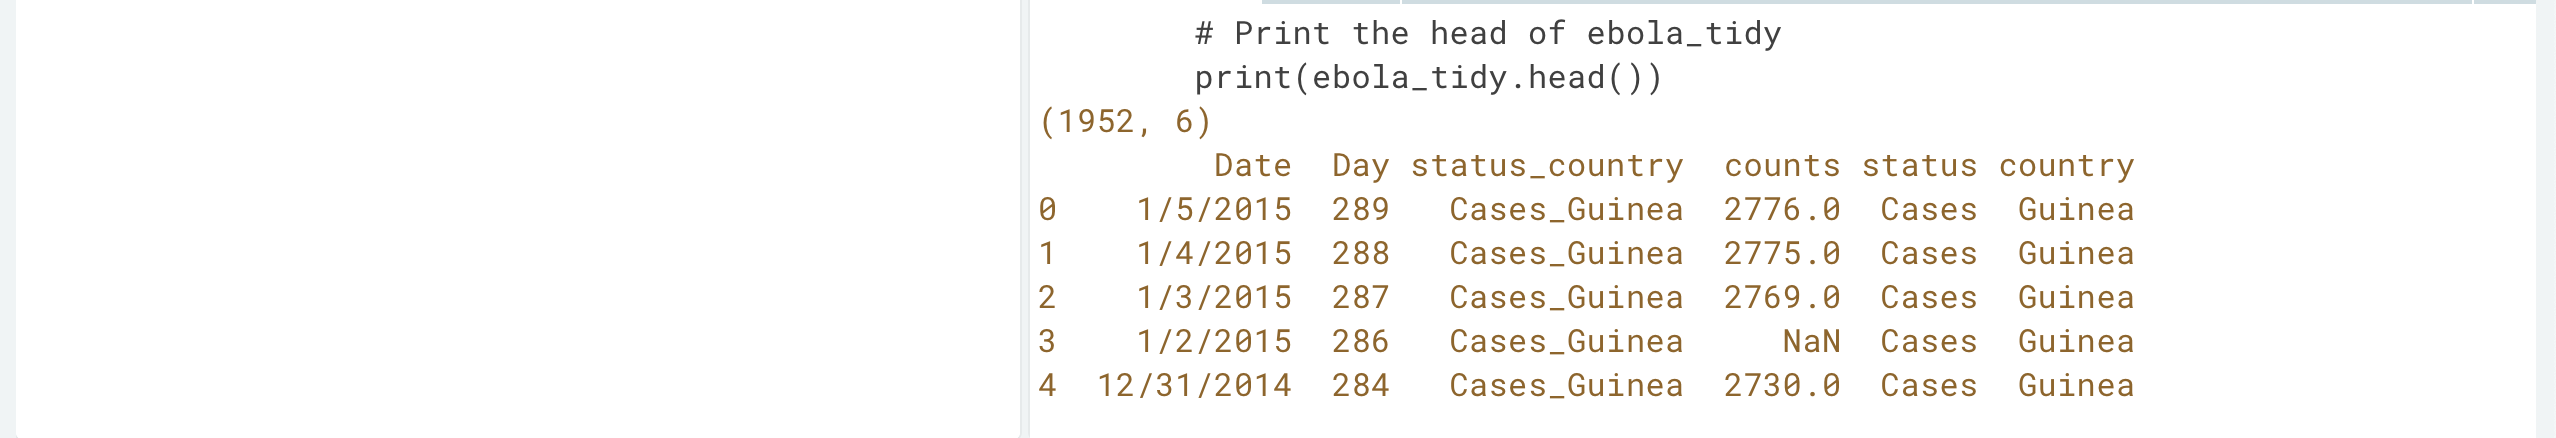

In [ ]:
#Import necessary modules
import pandas as pd
import glob

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

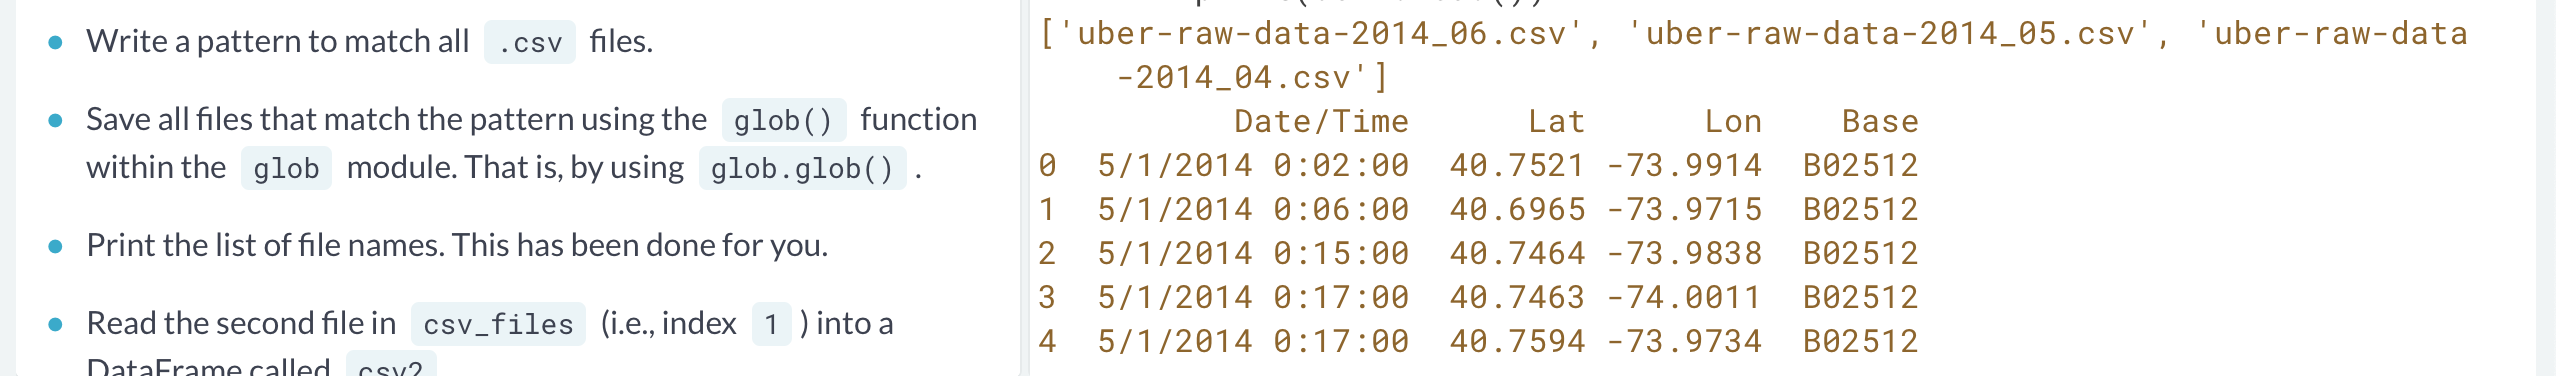

In [ ]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())

In [ ]:
Merge the DataFrames: o2o
o2o = pd.merge(left= site, right=visited, left_on= 'name', right_on='site')

# Print o2o
print(o2o)

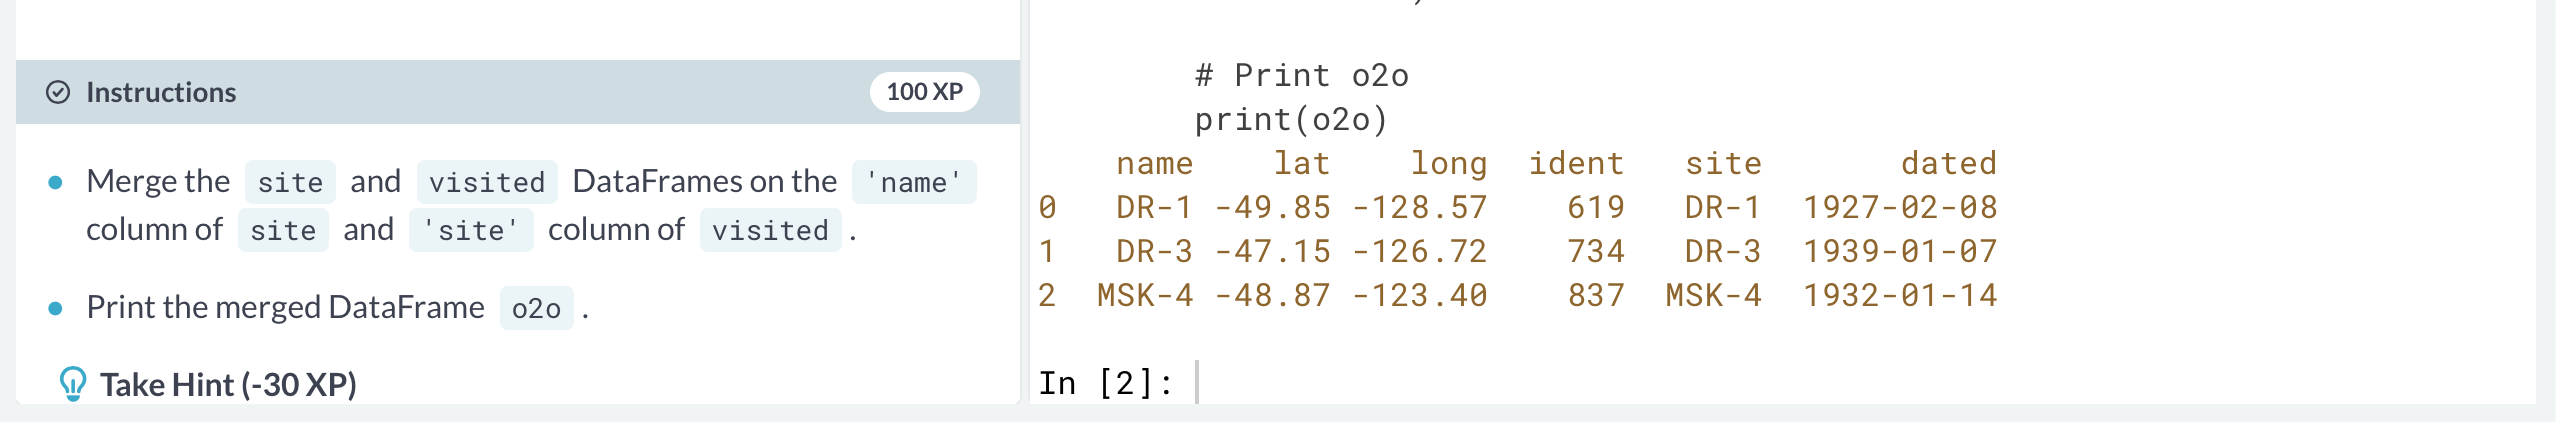

Many-to-1 data merge

In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.

Here, the two DataFrames site and visited have been pre-loaded once again. Note that this time, visited has multiple entries for the site column. Confirm this by exploring it in the IPython Shell.

The .merge() method call is the same as the 1-to-1 merge from the previous exercise, but the data and output will be different.



In [ ]:
Merge the DataFrames: m2o
m2o = pd.merge(left= site, right=visited, left_on='name', right_on='site')

# Print m2o
print(m2o)

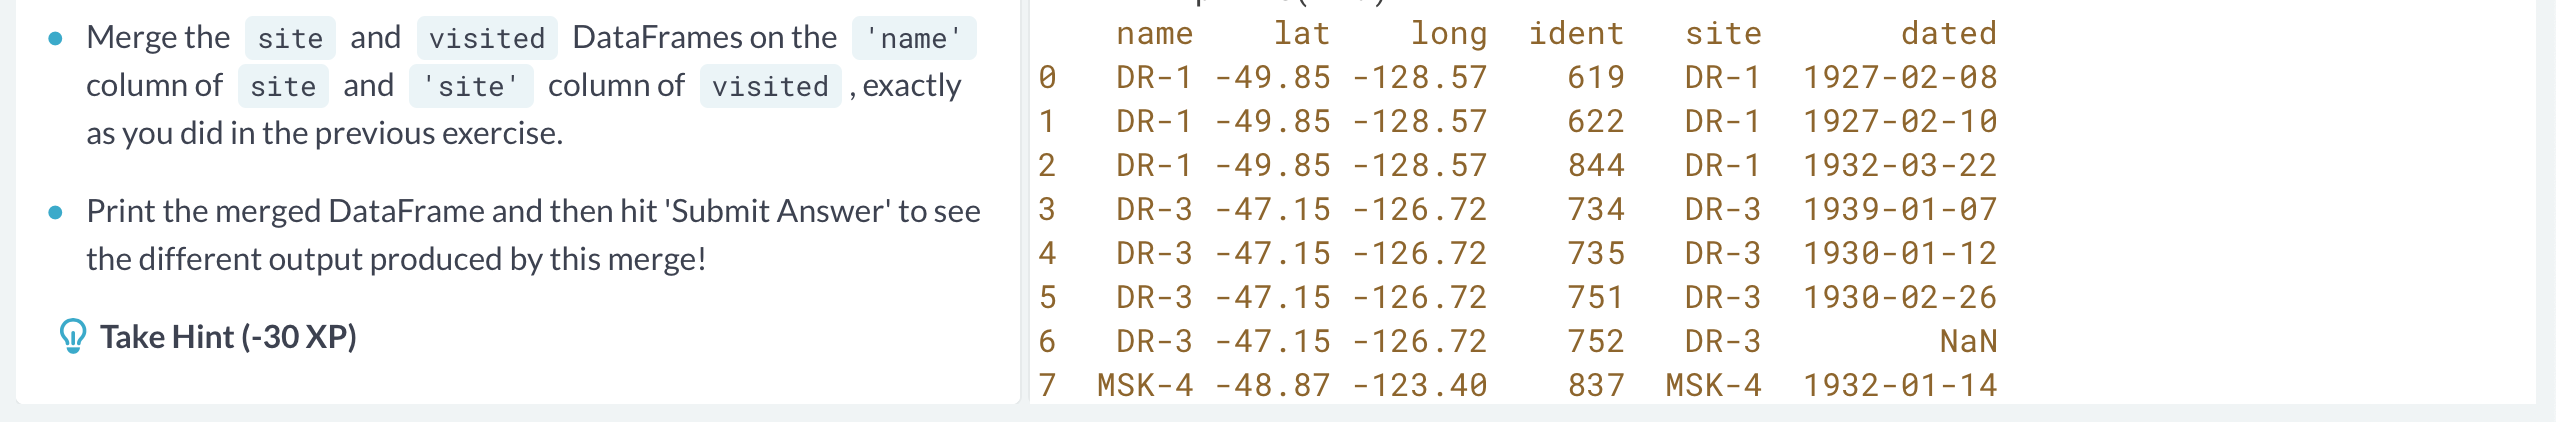

Many-to-many data merge

The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.

Two example DataFrames that share common key values have been pre-loaded: df1 and df2. Another DataFrame df3, which is the result of df1 merged with df2, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.

Here, you'll work with the site and visited DataFrames from before, and a new survey DataFrame. Your task is to merge site and visited as you did in the earlier exercises. You will then merge this merged DataFrame with survey.

Begin by exploring the site, visited, and survey DataFrames in the IPython Shell.



In [ ]:
# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
print(m2m.head(20))

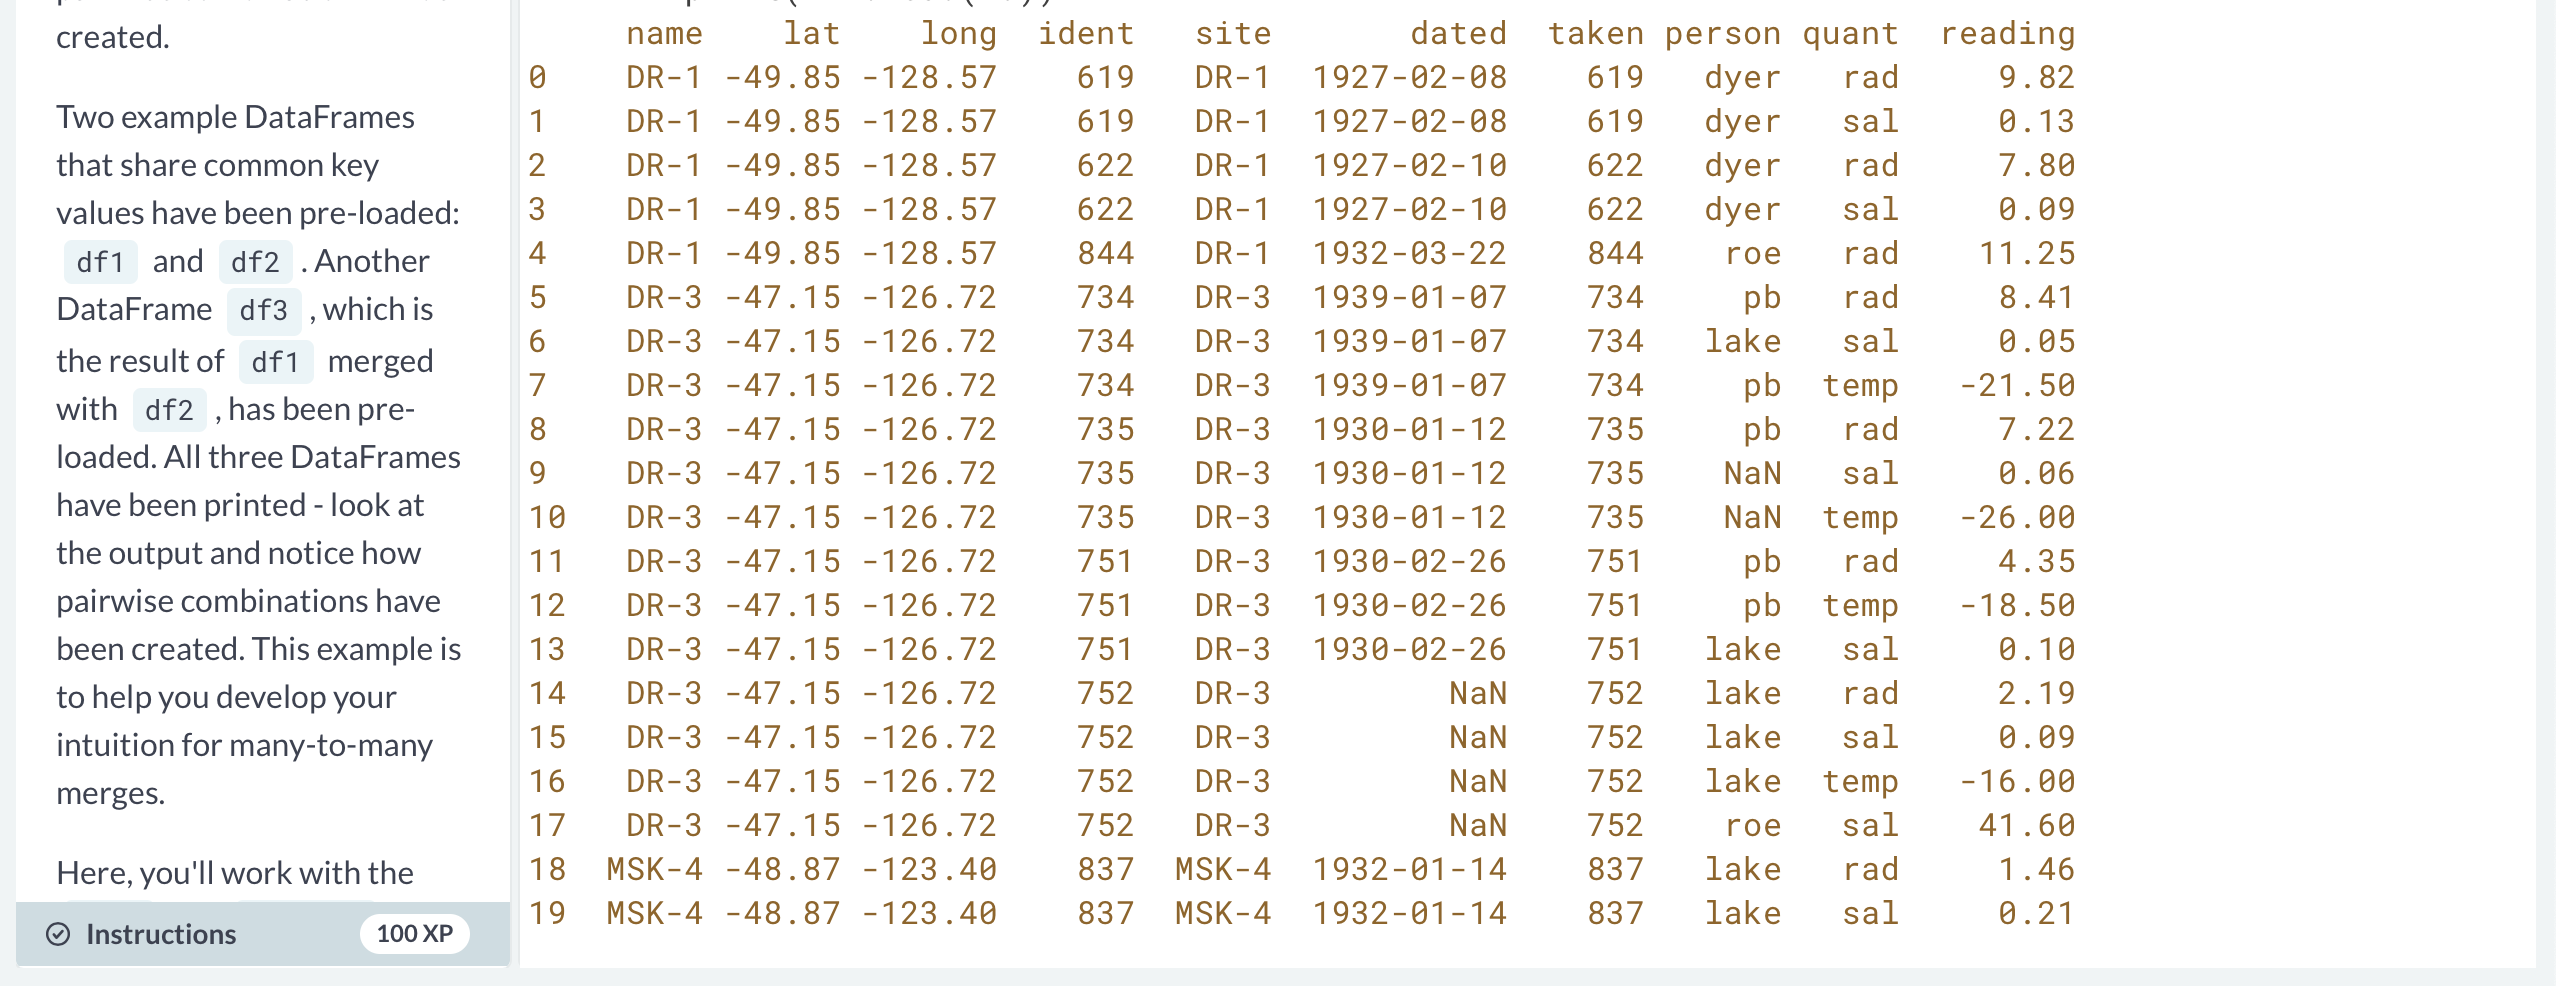

In [222]:
tips = pd.read_csv('tips.csv')

In [223]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


In [224]:
#Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors ='coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


In [225]:
# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0
    
    # Return 1 if gender is 'Male'
    elif gender == 'Male':
        return 1
        
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)

# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size recode
0       16.99  1.01  Female     No  Sun  Dinner     2      0
1       10.34  1.66    Male     No  Sun  Dinner     3      1
2       21.01  3.50    Male     No  Sun  Dinner     3      1
3       23.68  3.31    Male     No  Sun  Dinner     2      1
4       24.59  3.61  Female     No  Sun  Dinner     4      0


In [226]:
tips['total_dollar'] = '$' + tips['total_bill'].astype(str)


In [227]:
#Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
#tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size recode total_dollar  \
0       16.99  1.01  Female     No  Sun  Dinner     2      0       $16.99   
1       10.34  1.66    Male     No  Sun  Dinner     3      1       $10.34   
2       21.01  3.50    Male     No  Sun  Dinner     3      1       $21.01   
3       23.68  3.31    Male     No  Sun  Dinner     2      1       $23.68   
4       24.59  3.61  Female     No  Sun  Dinner     4      0       $24.59   

  total_dollar_replace  
0                16.99  
1                10.34  
2                21.01  
3                23.68  
4                24.59  


In [230]:
# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size recode total_dollar  \
0       16.99  1.01  Female     No  Sun  Dinner     2      0       $16.99   
1       10.34  1.66    Male     No  Sun  Dinner     3      1       $10.34   
2       21.01  3.50    Male     No  Sun  Dinner     3      1       $21.01   
3       23.68  3.31    Male     No  Sun  Dinner     2      1       $23.68   
4       24.59  3.61  Female     No  Sun  Dinner     4      0       $24.59   

  total_dollar_replace total_dollar_re  
0                16.99           16.99  
1                10.34           10.34  
2                21.01           21.01  
3                23.68           23.68  
4                24.59           24.59  


In [197]:
#Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}\-\d{3}\-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))

test = re.compile('\d*')
result3 = test.match('123456789')
print(bool(result3))

True
False
True


Extracting numerical values from strings

Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

Say you have the following string: 'the recipe calls for 6 strawberries and 2 bananas'.

It would be useful to extract the 6 and the 2 from this string to be saved for later use when comparing strawberry to banana ratios.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the re.findall() function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to re.findall(), and it will return a list of the matches.



Import re.
Write a pattern that will find all the numbers in the following string: 'the recipe calls for 10 strawberries and 1 banana'. To do this:
Use the re.findall() function and pass it two arguments: the pattern, followed by the string.
\d is the pattern required to find digits. This should be followed with a + so that the previous element is matched one or more times. This ensures that 10 is viewed as one number and not as 1 and 0.
Print the matches to confirm that your regular expression found the values 10 and 1.

In [194]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d*', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '10', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '1', '', '', '', '', '', '', '', '']


In [195]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)


['10', '1']


In [196]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}\-\d{3}\-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='\W*', string='Australia'))
print(pattern3)

True
True
True


In [198]:
#Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Create the df_subset:
df_subset = df.loc[:, ['Job #', 'Doc #', 'Borough', 'Initial Cost',
    'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage',
    'Street Frontage', 'ExistingNo. of Stories','Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

/Users/maia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [203]:
import re
from numpy import NaN
pattern = re.compile('^$\d*\.\d{2}$')

def diff_money (row, pattern):
    icost = row['Initial Cost']
    tef = row['Total Est. Fee']
    if bool (pattern.match(icost) and bool(pattern.match(tef))):
             icost = icost.replace('$', '')
             tef = tef.replace('$', '')
             
             icost = float(icost)
             tef = float(tef)
             
             return icost - tef
    else:
             return (NaN)
             
df_subset['diff'] = df_subset.apply(diff_money, axis = 1, pattern = pattern)
df_subset.head()
             
                               

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,diff
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0,NaN
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0,NaN
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54,NaN
3,121601203,1,MANHATTAN,$1500.00,$225.00,0,0,0,0,12,12,120,120,NaN
4,121601338,1,MANHATTAN,$19500.00,$389.50,0,0,0,0,6,6,64,64,NaN


In [204]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 14 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
diff                       0 non-null float64
dtypes: float64(1), int64(10), object(3)
memory usage: 1.4+ MB


In [231]:
# Create the new DataFrame: tracks
tracks = billboard[['year', 'artist', 'track', 'time']]

# Print info of tracks
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())

NameError: name 'billboard' is not defined

In [232]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None


Testing your data with asserts

Here, you'll practice writing assert statements using the Ebola dataset from previous chapters to programmatically check for missing values and to confirm that all values are positive. The dataset has been pre-loaded into a DataFrame called ebola.

In the video, you saw Dan use the .all() method together with the .notnull() DataFrame method to check for missing values in a column. The .all() method returns True if all values are True. When used on a DataFrame, it returns a Series of Booleans - one for each column in the DataFrame. So if you are using it on a DataFrame, like in this exercise, you need to chain another .all() method so that you return only one True or False value. When using these within an assert statement, nothing will be returned if the assert statement is true: This is how you can confirm that the data you are checking are valid.

Note: You can use pd.notnull(df) as an alternative to df.notnull().



Write an assert statement to confirm that there are no missing values in ebola.
Use the pd.notnull() function on ebola (or the .notnull() method of ebola) and chain two .all() methods (that is, .all().all()). The first .all() method will return a True or False for each column, while the second .all() method will return a single True or False.
Write an assert statement to confirm that all values in ebola are greater than or equal to 0.
Chain two all() methods to the Boolean condition (ebola >= 0).


In [234]:
# Assert that there are no missing values
assert pd.notnull(ebola).all().all()

# Assert that all values are >= 0
assert (ebola >= 0).all().all()

AssertionError: 

In [242]:
g1800s = pd.read_csv('gapminder.csv')

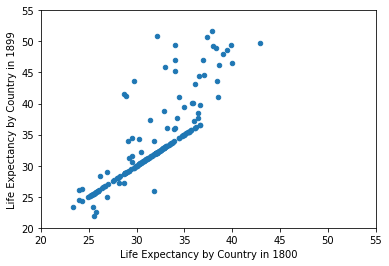

In [243]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

Excellent work! As you can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

In [255]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


AssertionError: 

Thinking about the question at hand

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

'Life expectancy' is the first column (index 0) of the DataFrame.
The other columns contain either null or numeric values.
The numeric values are all greater than or equal to 0.
There is only one instance of each country.
You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.



Define a function called check_null_or_valid() that takes in one argument: row_data.
Inside the function, convert no_na to a numeric data type using pd.to_numeric().
Write an assert statement to make sure the first column (index 0) of the g1800s DataFrame is 'Life expectancy'.
Write an assert statement to test that all the values are valid for the g1800s DataFrame. Use the check_null_or_valid() function placed inside the .apply() method for this. Note that because you're applying it over the entire DataFrame, and not just one column, you'll have to chain the .all() method twice, and remember that you don't have to use () for functions placed inside .apply().
Write an assert statement to make sure that each country occurs only once in the data. Use the .value_counts() method on the 'Life expectancy' column for this. Specifically, index 0 of .value_counts() will contain the most frequently occuring value. If this is equal to 1 for the 'Life expectancy' column, then you can be certain that no country appears more than once in the data.


In [256]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

AssertionError: 

In [245]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s])

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())


NameError: name 'g1900s' is not defined

In [259]:
import pandas as pd
gapminder = pd.read_csv('gapminder.csv') # this is not correct, just try a dataset for testing

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame = gapminder, id_vars = 'Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country        year  life_expectancy
0               Abkhazia  Unnamed: 0              0.0
1            Afghanistan  Unnamed: 0              1.0
2  Akrotiri and Dhekelia  Unnamed: 0              2.0
3                Albania  Unnamed: 0              3.0
4                Algeria  Unnamed: 0              4.0


In [260]:
import pandas as pd

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame = gapminder, id_vars = 'Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country        year  life_expectancy
0               Abkhazia  Unnamed: 0              0.0
1            Afghanistan  Unnamed: 0              1.0
2  Akrotiri and Dhekelia  Unnamed: 0              2.0
3                Albania  Unnamed: 0              3.0
4                Algeria  Unnamed: 0              4.0


In [261]:
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64

AttributeError: 'DataFrame' object has no attribute 'year'

Looking at country spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

The set of lower and upper case letters.
Whitespace between words.
Periods for any abbreviations.
To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names.



Create a Series called countries consisting of the 'country' column of gapminder.
Drop all duplicates from countries using the .drop_duplicates() method.
Write a regular expression that tests your assumptions of what characters belong in countries:
Anchor the pattern to match exactly what you want by placing a ^ in the beginning and $ in the end.
Use A-Za-z to match the set of lower and upper case letters, \. to match periods, and \s to match whitespace between words.
Use str.contains() to create a Boolean vector representing values that match the pattern.
Invert the mask by placing a ~ before it.
Subset the countries series using the .loc[] accessor and mask_inverse. Then hit 'Submit Answer' to see the invalid country names!


Excellent work! As you can see, not all these country names are actually invalid so maybe the assumptions need to be tweaked a little. However, there certainly are a few cases worth further investigation, such as St. Barth?lemy. Whenever you are dealing with columns of raw data consisting of strings, it is important to check them for consistency like this.



In [262]:
# Create the series of countries: countries
countries = gapminder['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

KeyError: 'country'

More data cleaning and processing

It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have NaN in the life_expectancy column. Before doing so, it would be valuable to use assert statements to confirm that year and country do not have any missing values.

Begin by printing the shape of gapminder in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!



Assert that country and year do not contain any missing values. The first assert statement has been written for you. Note the chaining of the .all() method to pd.notnull() to confirm that all values in the column are not null.
Drop the rows in the data where any observation in life_expectancy is missing. As you confirmed that country and year don't have missing values, you can use the .dropna() method on the entire gapminder DataFrame, because any missing values would have to be in the life_expectancy column. The .dropna() method has the default keyword arguments axis=0 and how='any', which specify that rows with any missing values should be dropped.
Print the shape of gapminder.


Great work! After dropping the missing values from 'life_expectancy', the number of rows in the DataFrame has gone down from 169260 to 43857. In general, you should avoid dropping too much of your data, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.



In [ ]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values
gapminder = gapminder.dropna()

# Print the shape of gapminder
print(gapminder.shape)

AttributeError: 'DataFrame' object has no attribute 'life_expectancy'

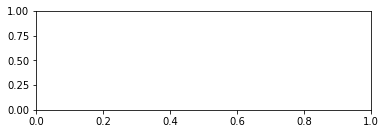

In [263]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')

In [278]:
import pandas as pd
city = ['Austin', 'Dallas', 'Alpharetta', 'Duluth']
signups = [7, 12, 3, 5]
visitors = [139, 237, 326, 456]
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
list_labels = ['weekday', 'city', 'signups', 'visitors']
list_cols = [city, signups, visitors, weekdays]


In [279]:
zipped = list(zip(list_labels, list_cols))
zipped

[('weekday', ['Austin', 'Dallas', 'Alpharetta', 'Duluth']),
 ('city', [7, 12, 3, 5]),
 ('signups', [139, 237, 326, 456]),
 ('visitors', ['Sun', 'Sun', 'Mon', 'Mon'])]

In [280]:
data = dict(zipped)
users = pd.DataFrame(data)
users

,weekday,city,signups,visitors
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Alpharetta,3,326,Mon
3,Duluth,5,456,Mon
